In [2]:
# Liblary for machine learning and built grap
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Liblary for work with request
import requests
import seaborn as sns 
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [4]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv'

req = requests.get(URL)

In [5]:
match req.status_code:
    case 200: 
        df = pd.read_csv(URL)
    case 404: 
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'

**EDA**
> - Загальна інформація про DataSet

In [6]:
# Подивимось на перші рядки з даними
df.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [7]:
# Подивимось на останні 5 рядків даних
df.tail()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [8]:
# Переглянемо рандомних 5 рядків
# !!!Бачимо, що cтовпчик unnamed:0 фактично дублює наш стовпчик з індексом, тому змінимо параметри імпорту
df.sample(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2737,2737,99902661,VITTSJÖ,Tables & desks,609.0,No old price,True,https://www.ikea.com/sa/en/p/vittsjoe-shelving...,No,"Shelving unit with laptop table, ...",Johan Kroon,36.0,NaN,202.0
651,651,60323592,BILLSBRO,Bookcases & shelving units,15.0,No old price,True,https://www.ikea.com/sa/en/p/billsbro-handle-s...,No,"Handle, 40 mm",H Preutz/A Fredriksson,NaN,NaN,NaN
524,524,10218536,ALGOT,Bookcases & shelving units,20.0,No old price,True,https://www.ikea.com/sa/en/p/algot-wall-uprigh...,Yes,"Wall upright, 84 cm",Francis Cayouette,NaN,84.0,4.0
398,398,9384051,HEMNES,Bookcases & shelving units,3986.0,"SR 4,185",True,https://www.ikea.com/sa/en/p/hemnes-storage-co...,Yes,"Storage combination w doors/drawers, ...",Carina Bengs,37.0,197.0,270.0
1855,1855,9323623,SMÅGÖRA,Nursery furniture,465.0,No old price,True,https://www.ikea.com/sa/en/p/smagoera-changing...,No,Changing tbl/bookshelf w 2 shlf ut,IKEA of Sweden,40.0,91.0,60.0


In [9]:
#Перезавантажимо дані і додамо колонку 'Unnamed: 0' як індекс-колонку
df = pd.read_csv(URL, sep=",", index_col='Unnamed: 0') 
print(df)

       item_id                   name       category   price     old_price  \
0     90420332               FREKVENS  Bar furniture   265.0  No old price   
1       368814              NORDVIKEN  Bar furniture   995.0  No old price   
2      9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0  No old price   
3     80155205                   STIG  Bar furniture    69.0  No old price   
4     30180504                NORBERG  Bar furniture   225.0  No old price   
...        ...                    ...            ...     ...           ...   
3689  99157902                ELVARLI      Wardrobes   750.0        SR 820   
3690   9158152                ELVARLI      Wardrobes  1572.0      SR 1,755   
3691  59157541                ELVARLI      Wardrobes   924.0      SR 1,050   
3692  89157573                ELVARLI      Wardrobes  2745.0      SR 3,130   
3693  69157376                ELVARLI      Wardrobes  1231.0      SR 1,535   

      sellable_online                                          

In [10]:
# Подивимось на перші рядки з даними
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [11]:
# Подивимось на останні 5 рядків даних
df.tail()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0
3693,69157376,ELVARLI,Wardrobes,1231.0,"SR 1,535",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


In [12]:
# Переглянемо рандомних 5 рядків
df.sample(5)

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1411,59303123,SVENBERTIL,Chairs,310.0,No old price,True,https://www.ikea.com/sa/en/p/svenbertil-swivel...,No,Swivel chair,Mia Lagerman,69.0,NaN,69.0
2121,80391844,DUVHOLMEN,Outdoor furniture,30.0,No old price,True,https://www.ikea.com/sa/en/p/duvholmen-inner-c...,No,"Inner cushion for chair cushion, ...",IKEA of Sweden,44.0,NaN,44.0
2537,49251983,HAVSTEN,Sofas & armchairs,2975.0,No old price,True,https://www.ikea.com/sa/en/p/havsten-3-seat-so...,No,"3-seat sofa, in/outdoor, 245x...",Andreas Fredriksson,94.0,90.0,245.0
1988,59289424,ÄPPLARÖ,Outdoor furniture,1961.0,No old price,True,https://www.ikea.com/sa/en/p/aepplaroe-table-4...,Yes,"Table+4 chairs w armrests, outdoor",IKEA of Sweden/K Hagberg/M Hagberg,NaN,NaN,NaN
651,60323592,BILLSBRO,Bookcases & shelving units,15.0,No old price,True,https://www.ikea.com/sa/en/p/billsbro-handle-s...,No,"Handle, 40 mm",H Preutz/A Fredriksson,NaN,NaN,NaN


In [13]:
# Подивимось на розмір таблиці -> 3694 рядків * 13 стовпчиків
df.shape

(3694, 13)

In [14]:
# З розширеної інформації бачимо, що числові дані: item_id, price, depth, height, width.
# Але 3 останні мають пусті значення. Тобто в нас в більшості категоріальний DS
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [15]:
# Бачимо, що ціна варіюється від 3 до 9585, а середня 1078,2. 
# По розмірах: є зовсім малі товари (в межах 1 см) і дуже великі - до 7 метрів
df.describe().round(1)

,item_id,price,depth,height,width
count,3694.0,3694.0,2231.0,2706.0,3105.0
mean,48632396.8,1078.2,54.4,101.7,104.5
std,28887094.1,1374.7,30.0,61.1,71.1
min,58487.0,3.0,1.0,1.0,1.0
25%,20390574.0,180.9,38.0,67.0,60.0
50%,49288078.0,544.7,47.0,83.0,80.0
75%,70403572.8,1429.5,60.0,124.0,140.0
max,99932615.0,9585.0,257.0,700.0,420.0


In [16]:
# Подивимось на назви колонок
df.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width'],
      dtype='object')

In [17]:
# Бачимо, що пустих значень в розмірах досить багато, тому участь цих параметрів в аналізі потрібно обмежити або спробувати заповнити
df.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [18]:
#Подивимось яка кількість товару немає жодного розміру -> 417 шт
df[(df['depth'].isnull()) & (df['height'].isnull()) & (df['width'].isnull())].shape

(417, 13)

In [19]:
# Бачимо, що товари з повністю відсутніми розмірами є майже у всіх категоріях (найбільше в 'Sofas & armchairs')
df[(df['depth'].isnull()) & (df['height'].isnull()) & (df['width'].isnull())].groupby('category').count()

,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
category,,,,,,,,,,,,
Bar furniture,9,9,9,9,9,9,9,9,9,0,0,0
Beds,11,11,11,11,11,11,11,11,11,0,0,0
Bookcases & shelving units,29,29,29,29,29,29,29,29,29,0,0,0
Cabinets & cupboards,22,22,22,22,22,22,22,22,22,0,0,0
Café furniture,3,3,3,3,3,3,3,3,3,0,0,0
Chairs,71,71,71,71,71,71,71,71,71,0,0,0
Children's furniture,3,3,3,3,3,3,3,3,3,0,0,0
Nursery furniture,3,3,3,3,3,3,3,3,3,0,0,0
Outdoor furniture,42,42,42,42,42,42,42,42,42,0,0,0


In [20]:
#Слід зауважити, що в деяких товарах в стопчику 'short_description' вказані розміри. 
#Розглянути можливість виокремлення цих розмірів для внесення в стовпчики з розмірами
df[(df['depth'].isnull()) & (df['height'].isnull()) & (df['width'].isnull())]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN
28,29297227,STENSELE / NORRARYD,Bar furniture,1340.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-norraryd...,No,Bar table and 2 bar stools,Nike Karlsson/Maja Ganszyniec,NaN,NaN,NaN
32,19297275,NORRÅKER / NORRÅKER,Bar furniture,1266.0,"SR 1,385",True,https://www.ikea.com/sa/en/p/norraker-norraker...,No,"Bar table and 2 bar stools, 7...",J Karlsson/N Karlsson,NaN,NaN,NaN
34,20336619,HENRIKSDAL,Bar furniture,40.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-cover-...,No,Cover for bar stool with backrest,IKEA of Sweden,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,30323598,BILLSBRO,TV & media furniture,49.0,No old price,True,https://www.ikea.com/sa/en/p/billsbro-handle-s...,No,"Handle, 1880 mm",H Preutz/A Fredriksson,NaN,NaN,NaN
3447,80414256,VASSVIKEN,TV & media furniture,100.0,No old price,True,https://www.ikea.com/sa/en/p/vassviken-door-dr...,No,"Door/drawer front, 60x38 cm",IKEA of Sweden,NaN,NaN,NaN
3450,60334312,BILLSBRO,TV & media furniture,35.0,No old price,True,https://www.ikea.com/sa/en/p/billsbro-handle-w...,No,"Handle, 320 mm",H Preutz/A Fredriksson,NaN,NaN,NaN
3576,89325289,PLATSA,Wardrobes,450.0,SR 475,True,https://www.ikea.com/sa/en/p/platsa-open-shelv...,No,"Open shelving unit, 140x40x63 cm",Ola Wihlborg/IKEA of Sweden,NaN,NaN,NaN


> - Стовпчик 'item_id'

In [21]:
# Подивимось детальніше на стовпчик 'item_id' -> Бачимо що унікальних значень менше ніж заг. к-сті записів (2962 vs 3694)
df['item_id'].nunique()

2962

In [22]:
# Потрібно зрозуміти, що це за дубльовані рядки з item_id
df[df.duplicated(keep=False, subset=['item_id'])].sort_values('item_id')

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1918,91415,TROFAST,Nursery furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
1834,91415,TROFAST,Children's furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
151,102065,LYCKSELE LÖVÅS,Beds,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
2560,102065,LYCKSELE LÖVÅS,Sofas & armchairs,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
2178,105064,LIATORP,"Sideboards, buffets & console tables",445.0,No old price,True,https://www.ikea.com/sa/en/p/liatorp-console-t...,No,"Console table, 133x37 cm",Carina Bengs,NaN,75.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,99323614,SMÅGÖRA,Nursery furniture,370.0,No old price,True,https://www.ikea.com/sa/en/p/smagoera-changing...,No,Changing tbl/bookshelf w 1 shlf ut,IKEA of Sweden,40.0,91.0,60.0
3028,99323925,STENSELE,Tables & desks,550.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-bar-tabl...,No,"Bar table, 70x70 cm",Maja Ganszyniec,NaN,104.0,70.0
29,99323925,STENSELE,Bar furniture,550.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-bar-tabl...,No,"Bar table, 70x70 cm",Maja Ganszyniec,NaN,104.0,70.0
2737,99902661,VITTSJÖ,Tables & desks,609.0,No old price,True,https://www.ikea.com/sa/en/p/vittsjoe-shelving...,No,"Shelving unit with laptop table, ...",Johan Kroon,36.0,NaN,202.0


In [23]:
#На перший погляд наші дублікати повністю ідентичні, окрім фічі 'category'. Перевіримо нашу теорію.
duplicate_item = df[df.duplicated(keep=False, subset=['item_id'])].sort_values('item_id')
duplicate_item.drop(columns='category', inplace=True) #видаляємо колонку 'category'

In [24]:
duplicate_item.shape #к-сть дублікатів item_id = 1352

(1352, 12)

In [25]:
duplicate_item.duplicated(keep=False).shape #к-сть дублікатів цілими рядками (без категорій) ідентична = 1352

(1352,)

In [26]:
duplicate_item['item_id'].nunique()

620

In [27]:
df[df.duplicated(subset=['item_id'])].shape

(732, 13)

>>Висновок: в даному датасеті частина товарів (620 шт) дублюються (732 рази загалом), оскільки можуть відноситись до різних категорій товарів.
Потрібно врахувати це в майбутньому аналізі (для аналізу категорій, це можливо відіграє позитивну роль, а от при аналізі інших показників, це створює задвоєння). Як варіант вирішення даної проблеми можливо обєднання певних категорій для подальшого аналізу і видалення дублікатів в новостворених категоріях. Або створення окремого датасету з видаленням дублікатів для аналізу показників, відмінних від колонки 'category'.

> - Стовпчик 'name'

In [28]:
# К-сть унікальних найменувань товарів/колекцій - 607 шт.
df['name'].nunique()

607

In [29]:
#Поглянемо розкид цін на найбільшчисельні колекції (найбільша к-сть різних товарів в колекції)
top_name = df.groupby('name')['item_id'].count().reset_index()
top_name = top_name.sort_values('item_id', ascending=False).iloc[:21]
print(top_name.name)

30               BESTÅ
412                PAX
163            GRÖNLID
22              BEKANT
545            TROFAST
216               IVAR
578              VIMLE
95                EKET
431             PLATSA
279            LIDHULT
219            JONAXEL
385             NORDLI
175             HAVSTA
504    STUVA / FRITIDS
180             HEMNES
99             ELVARLI
224             KALLAX
563         VALLENTUNA
6                ALGOT
596            ÄPPLARÖ
54                BROR
Name: name, dtype: object


In [30]:
df_top_name = df[df['name'].isin(top_name.name)]

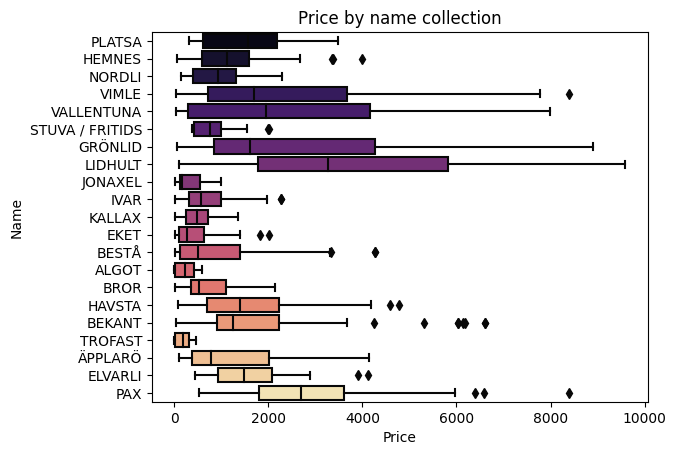

In [31]:
#Поглянемо розкид цін на найбільшчисельні колекції (найбільша к-сть різних товарів в колекції)
#Бачимо, що розкид цін досить широкий
sns.boxplot(data=df_top_name, y="name", x="price", palette= 'magma')
plt.xlabel('Price')
plt.ylabel('Name')
plt.title('Price by name collection')
plt.show();

> - Стовпчик 'category'

In [32]:
# Подивимось скільки унікальних значень є в категоріях
df['category'].nunique()

17

In [33]:
# Подивимось певну статистичну інформацію в розрізі категорій
df.groupby('category').agg({'price':['count', 'mean', 'max', 'min']}).round(0)

price                       
                                     count    mean     max    min
category                                                         
Bar furniture                           47   680.0  2375.0   40.0
Beds                                   208  1647.0  9585.0   30.0
Bookcases & shelving units             548   519.0  4335.0    3.0
Cabinets & cupboards                   292   789.0  6480.0    3.0
Café furniture                          26   554.0  1385.0  145.0
Chairs                                 481  1049.0  6965.0   11.0
Chests of drawers & drawer units       125   612.0  1880.0   49.0
Children's furniture                   124   273.0  1545.0    5.0
Nursery furniture                       97   394.0  1545.0    5.0
Outdoor furniture                      216   860.0  5144.0    9.0
Room dividers                           13   932.0  2397.0  189.0
Sideboards, buffets & console tables    23  1068.0  2100.0  295.0
Sofas & armchairs                      428  2004.0  9585.0   27.0
TV & media furniture                   190   659.0  4260.0    3.0
Tables & desks                         612  1129.0  6965.0    9.0
Trolleys                                28   679.0  2295.0   39.0
Wardrobes                              236  2162.0  8380.0   45.0

<Axes: xlabel='count', ylabel='category'>

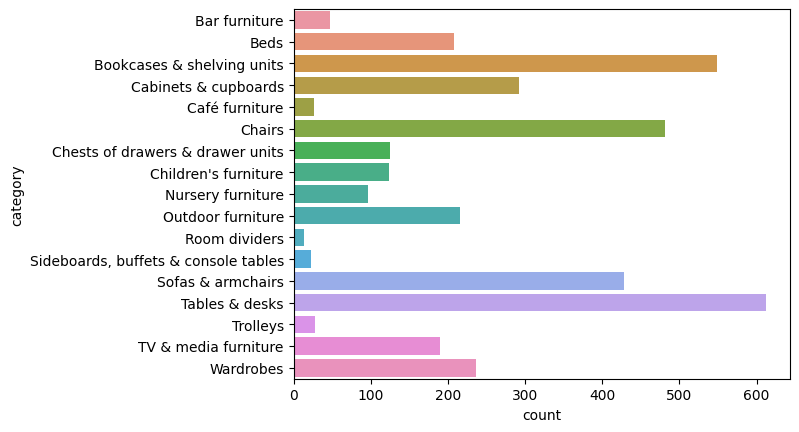

In [34]:
# Найбільшчисельні категорії:'Tables & desks', 'Bookcases & shelving units', 'Chairs'
#Найменший асортимент представлений в категоріях: 'Room dividers', 'Sideboards, buffets & console tables', 'Café furniture', 'Trolleys'.
sns.countplot(data=df, y='category')

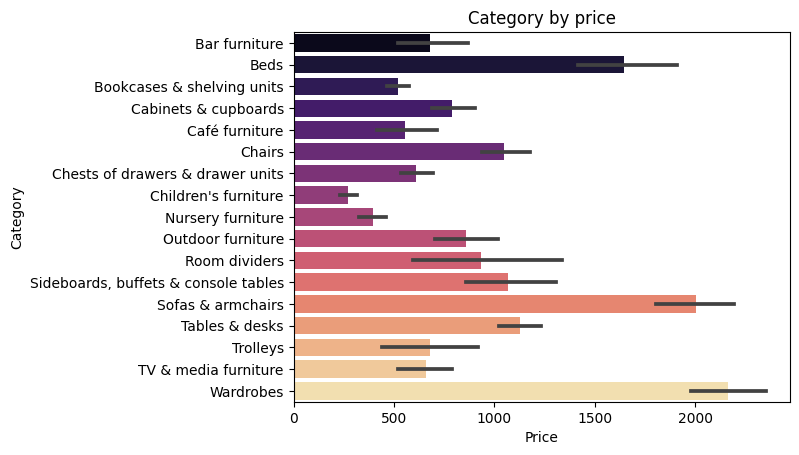

In [35]:
sns.barplot(data=df, y="category", x="price", palette= 'magma')
#plt.grid()
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Category by price')
plt.show();

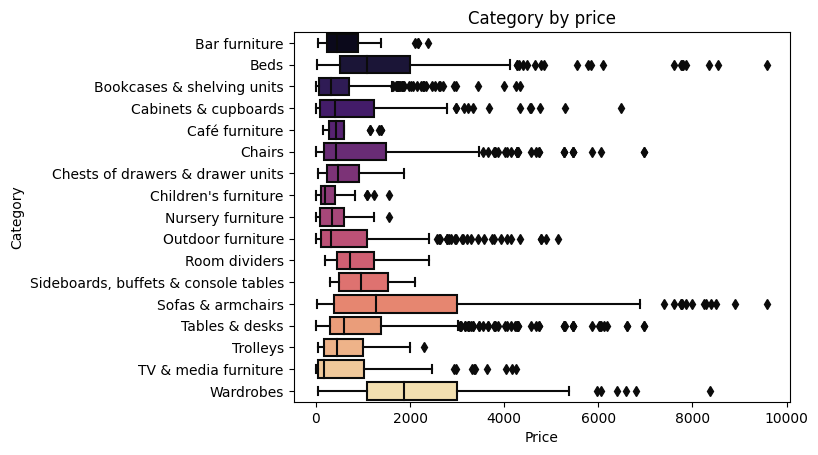

In [36]:
#Бачимо, що розкид цін досить великий і багато викидів
sns.boxplot(data=df, y="category", x="price", palette= 'magma')
#plt.grid()
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Category by price')
plt.show();

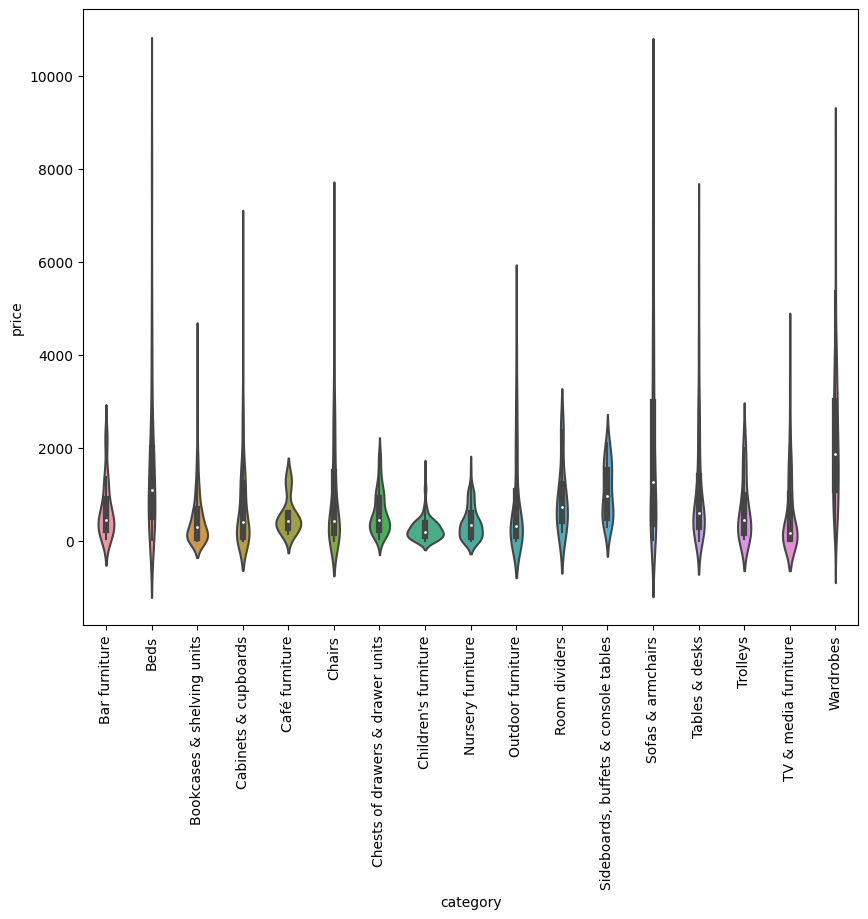

In [37]:
plt.subplots(figsize = (10,8))
sns.violinplot(data = df, y = 'price', x = 'category')
plt.xticks(rotation = 90)
plt.show()

>>Висновок: Фіча 'category' має відносно мало унікальних значень (17), але розкид кількості даних в цих категоріях великий (від 13 шт до 612 шт), що не дуже добре для майбутнього ML. Цю проблему частково може вирішити обєднання деяких споріднених категорій (це також частково вирішить проблему з дублікатами item_id).

> - Стовпчик 'old_price'

In [38]:
#Подивимось на стовпчик Old price
df[df['old_price'] == 'No old price'].shape


(3040, 13)

In [39]:
#Оскільки відносно мало товарів мають Old price і на перший погляд стара ціна більша за поточну, 
#то можна припустити, що ці 654 товари зараз на акції
df[df['old_price'] != 'No old price'].shape

(654, 13)

In [40]:
df[df['old_price'] != 'No old price']

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
9,69304221,EKEDALEN / EKEDALEN,Bar furniture,2176.0,"SR 2,375",True,https://www.ikea.com/sa/en/p/ekedalen-ekedalen...,No,Bar table and 4 bar stools,Ehlén Johansson,NaN,NaN,NaN
13,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0
17,50363649,KULLABERG,Bar furniture,140.0,SR 175,True,https://www.ikea.com/sa/en/p/kullaberg-stool-b...,Yes,Stool,Sarah Fager,36.0,NaN,36.0
23,90400517,EKEDALEN,Bar furniture,796.0,SR 995,True,https://www.ikea.com/sa/en/p/ekedalen-bar-tabl...,No,"Bar table, 120x80 cm",Ehlén Johansson,NaN,105.0,80.0
26,40400529,EKEDALEN,Bar furniture,796.0,SR 995,True,https://www.ikea.com/sa/en/p/ekedalen-bar-tabl...,No,"Bar table, 120x80 cm",Ehlén Johansson,NaN,105.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


In [41]:
df[df['old_price'] != 'No old price'].groupby('category').agg({'price':['count', 'mean', 'max', 'min']})

price                            
                                     count         mean     max    min
category                                                              
Bar furniture                            9  1117.666667  2176.0  140.0
Beds                                    50  2378.940000  8551.0   30.0
Bookcases & shelving units              80   596.125000  3986.0    5.6
Cabinets & cupboards                    24   858.983333  2666.0    5.6
Café furniture                           3   417.333333   596.0  180.0
Chairs                                  68  1071.700000  4295.0   11.4
Chests of drawers & drawer units        53   800.858491  1880.0  135.0
Children's furniture                     4   271.750000   451.0  140.0
Nursery furniture                        2   406.000000   796.0   16.0
Outdoor furniture                       41   921.941463  3286.0   14.4
Room dividers                            5  1360.400000  2397.0  357.0
Sideboards, buffets & console tables     1   796.000000   796.0  796.0
Sofas & armchairs                      117  2073.923077  7988.0   27.0
TV & media furniture                    19  1055.663158  3386.0    5.6
Tables & desks                          94  1307.117021  6614.0   51.0
Trolleys                                 2   441.750000   537.0  346.5
Wardrobes                               82  1727.859756  5965.0  297.5

>> Висновок: Тільки 654 товари з 3694 мають стару ціну і на перший погляд вона більша за поточну, тому можна припустити, що ці 654 товари на момент витягнення DataSet були на акції. Можливо є сенс створити окремий стовпчик - "standart price", де внести стару ціну для товарів де вона є, а для товарів де її немає - внести дані з стовпчика price. 
Як на мене, використання стандартної ціни для побудови моделі ML для прогнозу ціни буде більш коректним.
Також цікаво буде проаналізувати % знижки по різних категоріях.

> - Стовпчик 'sellable_online'

<Axes: xlabel='sellable_online', ylabel='count'>

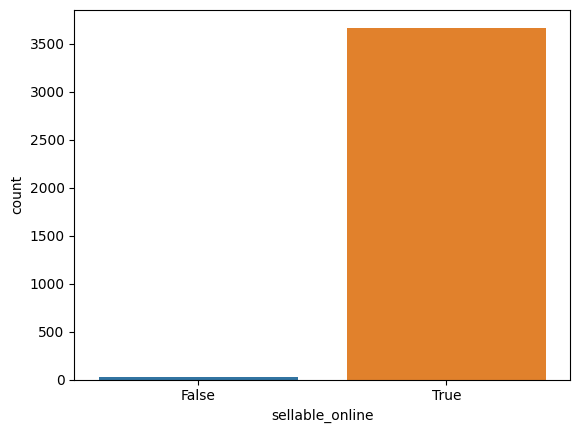

In [42]:
#Більшість товарів можна придбати онлайн, тільки 28 товарів не доступні для продажу онлайн
#Тому не бачу цінності в даній фічі для майбутньої моделі
sns.countplot(data=df, x='sellable_online')

In [43]:
df[df['sellable_online'] == False].shape

(28, 13)

> - Стовпчик 'link'
>> Не бачу якоїсь цінності в даній інформації, тому в майбутньому можливе видалення даного стовпчика

In [44]:
df['link'].iloc[1:5]

1    https://www.ikea.com/sa/en/p/nordviken-bar-tab...
2    https://www.ikea.com/sa/en/p/nordviken-nordvik...
3    https://www.ikea.com/sa/en/p/stig-bar-stool-wi...
4    https://www.ikea.com/sa/en/p/norberg-wall-moun...
Name: link, dtype: object

> - Стовпчик 'other_colors'

<Axes: xlabel='other_colors', ylabel='count'>

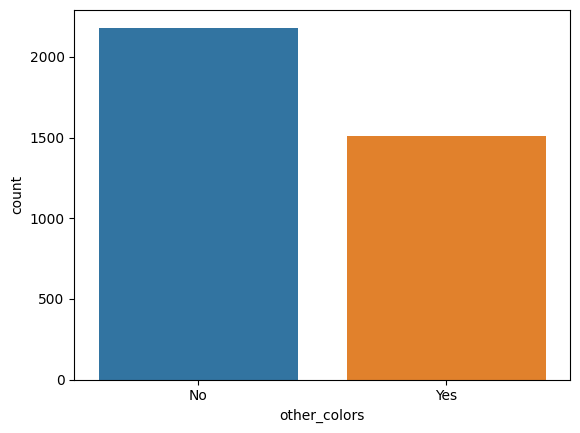

In [45]:
#Більшість товарів доступна в єдиному кольорі, але понад 1500 товарів мають доступні інші кольора
sns.countplot(data=df, x='other_colors')

In [46]:
# Тут більш менш рівномірний розподіл даних, тому можна перевірити в майбутньому чи це впливає на ціну або інші параметри
df['other_colors'].value_counts()

other_colors
No     2182
Yes    1512
Name: count, dtype: int64

> - Стовпчик 'short_description'
>> Розглянути можливість виокремлення деякої інформації про розміри з даного стовпчика для використання заповнення пропущених даних

> - Стовпчик 'designer'

In [47]:
df['designer'].nunique()

381

In [48]:
#Бачимо, що дані містять символи і помилкові значення, а також багато спільних розробок, різних дизайнерів
df['designer'].unique()

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

>>Висновок: даний стовпчик підлягає очищенню перед подальшим аналізом

> - Стовпчик 'depth', 'height', 'width'
>> Pозглядали в заг аналізі вище, в розрізі пустих значень.
>> Підлягають заповненню або видаленню пустих значень

price
depth
height


width


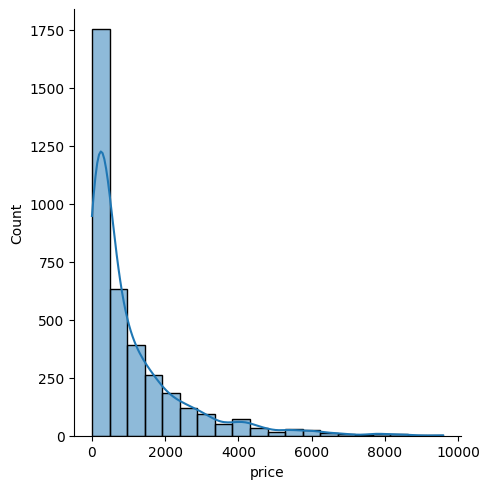

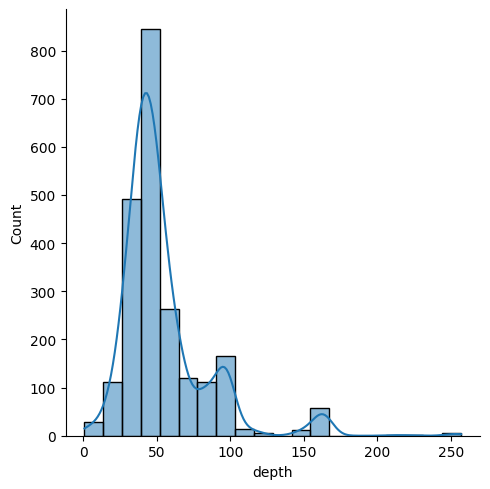

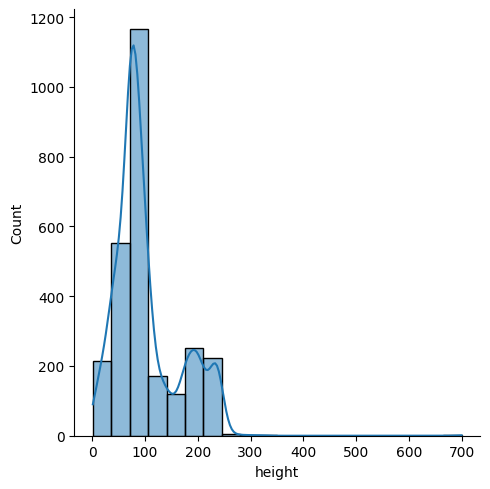

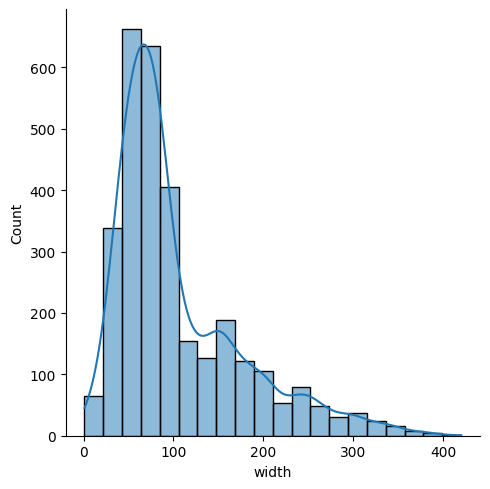

In [49]:
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    sns.displot(df[col], kde = True, bins = 20);

price


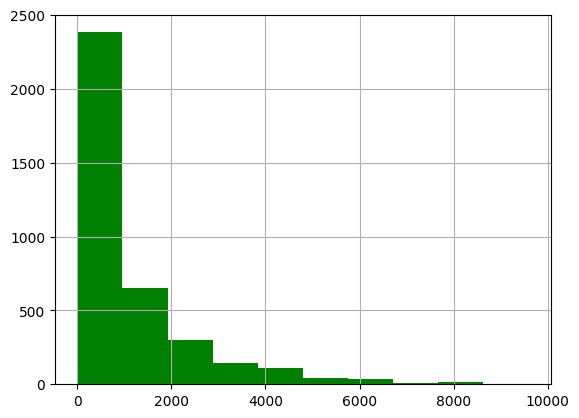

depth


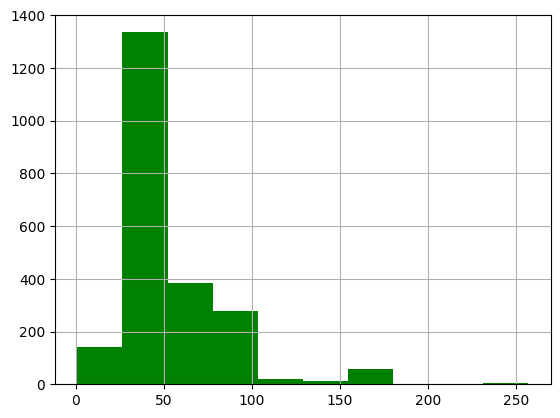

height


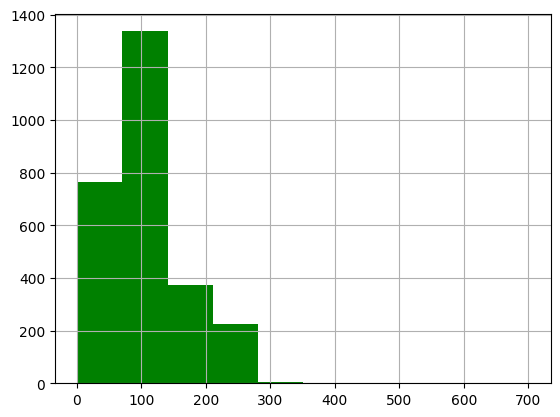

width


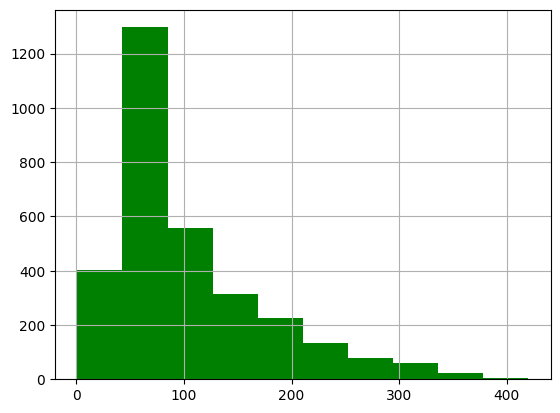

In [50]:
#Інший варіант
for col in ['price', 'depth', 'height', 'width']:
    print(col)
    plt.hist(df[col], color = 'green', bins = 10)
    plt.grid()
    plt.show()

> - Загальні графіки

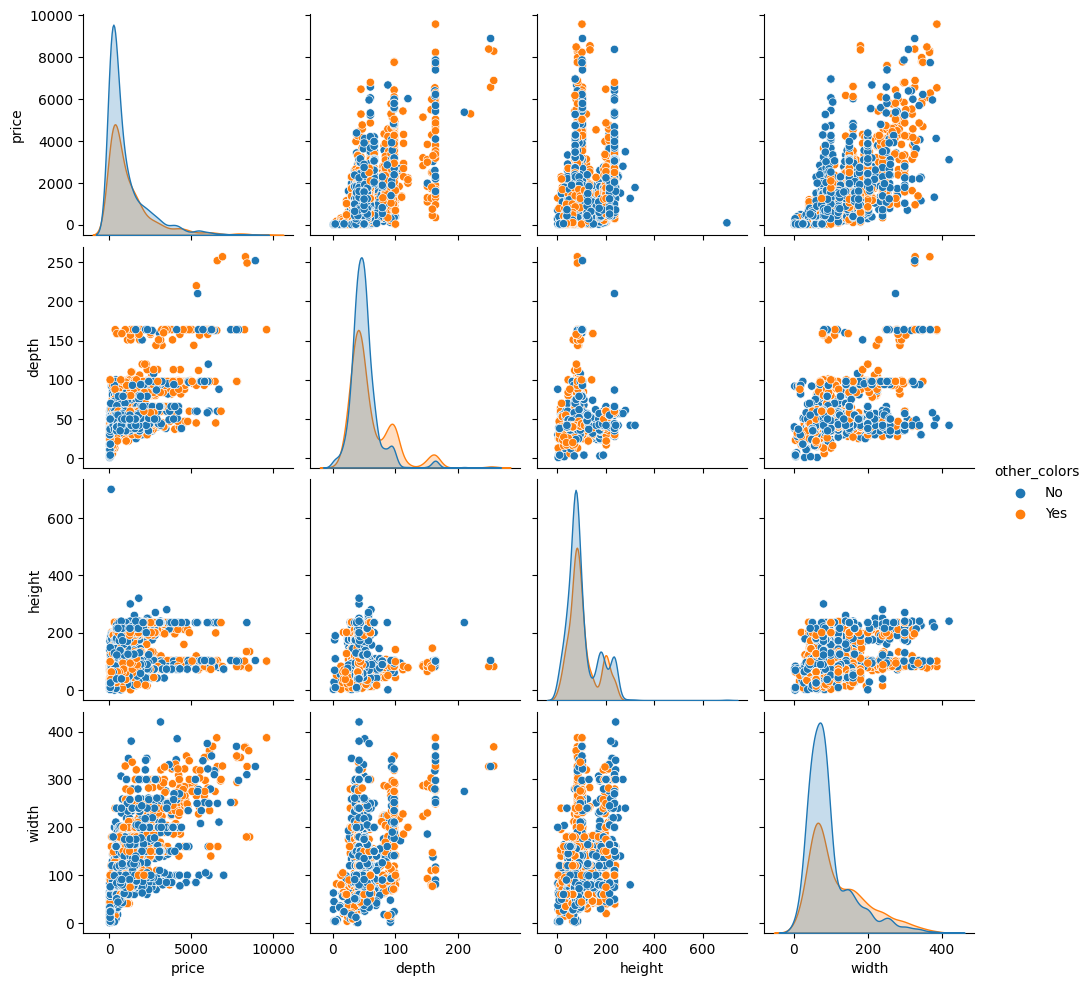

In [51]:
sns.pairplot(df[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors')

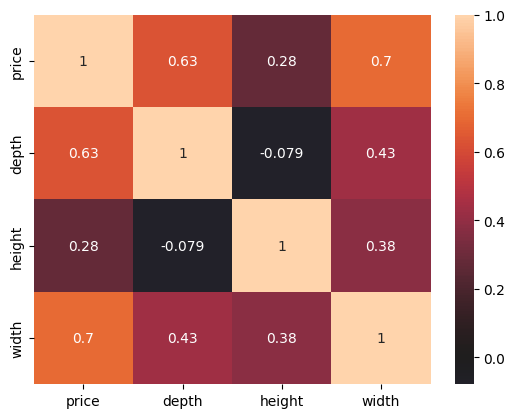

In [52]:
# З теплової карти видно, що гіпотетично непогано повинні корелюватись ціна і глибина, ціна і ширина. А ось висота не сильно корелюється з ціною
sns.heatmap(df[['price', 'depth', 'height', 'width']].corr(), xticklabels= df[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

>**EDA. Висновки та майбутні кроки** 
> - Наші дані в більшості категоріальні. Кількісними є: код товару; ціна - це буде наша ціль; висота, ширина, глибина - мають багато пропущених значень.
> - Колонки в яких не бачу цінності для майбутнього аналізу (підлягають видаленню): 'sellable_online', 'link'.
> - Колонка 'category' має відносно мало унікальних значень (17), але розкид кількості даних в цих категоріях великий (від 13 шт до 612 шт), що не дуже добре для майбутнього ML. Цю проблему частково може вирішити обєднання деяких споріднених категорій. Перед обєднанням дослідити дані з різних стовпців.
> - Частина товарів (620 шт) дублюються (732 рази загалом), оскільки можуть відноситись до різних категорій товарів. Після обєднання споріднених категорій необхідно видалити повні дублікати. Скоріш за все, це не вирішить повністю проблему, бо дублікати ще залишаться. Потрібно врахувати це в майбутньому аналізі (для аналізу категорій, це можливо відіграє позитивну роль, а от при аналізі інших показників, це створює задвоєння). Як варіант створення окремого датасету з видаленням дублікатів для аналізу показників, відмінних від колонки 'category'.
> - Для створення в майбутньому моделі для прогнозування ціни, нам важливо мати чисті дані в цій категорії. При аналізі колонки 'old_price', виявилось, що тільки 654 товари з 3694 мають стару ціну і на перший погляд вона більша за поточну. Тому можна припустити, що ці 654 товари на момент витягнення DataSet були на акції. Можливо є сенс створити окремий стовпчик - "standart price", де внести стару ціну для товарів де вона є, а для товарів де її немає - внести дані з стовпчика price. Як на мене, використання стандартної ціни для побудови моделі ML для прогнозу ціни - буде більш коректним.
Також цікаво буде проаналізувати % знижки по різних категоріях.
> - Заповнення пропущених даних. Пропущеними є деякі дані в розмірах. В стовпчику 'short_description' є в описі деякі розміри, розглянути можливість виокремлення цієї інформації для заповнення пропущених даних. Решту заповнити - середнім, оскільки на графіках видно, що багато викидів, які спотворюють значення середньої. Або варіант видалення рядків з пустими значеннями.
> - Колонка 'designer' підлягає очищенню перед подальшим аналізом

**Очистка, заповнення, видалення**

In [53]:
# Створюємо копію dataset
df1 = df.copy()

In [54]:
# Видаляємо колонки, які немають цінності для подальшого аналізу
df1 = df1.drop(columns=['sellable_online', 'link'])

In [55]:
#Створюємо колонку "standart price" для перевірки гіпотези про акційні товари.
import re
for i in range(df1.shape[0]):
    if df1.loc[i, 'old_price'] == 'No old price':
        df1.loc[i, 'st_price'] = df1.loc[i, 'price']
    elif re.search('/', df1.loc[i, 'old_price']):
        df1.loc[i, 'st_price'] = re.sub('[(/)]\d\s\D*', '', df1.loc[i, 'old_price'][3:])
    else:
        df1.loc[i, 'st_price'] = df1.loc[i, 'old_price'][3:].replace(',', '')        

df1['st_price'] = pd.to_numeric(df1['st_price'], errors='coerce')


df1.sample(5)

,item_id,name,category,price,old_price,other_colors,short_description,designer,depth,height,width,st_price
3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0,1755.0
80,89305446,PLATSA,Beds,2600.5,"SR 2,880",No,"Bed frame with 10 doors, 143x...",IKEA of Sweden,40.0,43.0,143.0,2880.0
902,19057906,BESTÅ,Cabinets & cupboards,480.0,No old price,Yes,"Wall cabinet with 2 doors, 60...",IKEA of Sweden,22.0,128.0,60.0,480.0
595,89280747,BILLY / OXBERG,Bookcases & shelving units,1480.0,No old price,Yes,"Bookcase with panel/glass doors, ...",Gillis Lundgren/K Hagberg/M Hagberg,30.0,202.0,160.0,1480.0
1019,80295300,BESTÅ,Cabinets & cupboards,100.0,No old price,Yes,"Top panel for TV, 120x40 cm",IKEA of Sweden,40.0,NaN,120.0,100.0


In [56]:
df1.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
st_price                0
dtype: int64

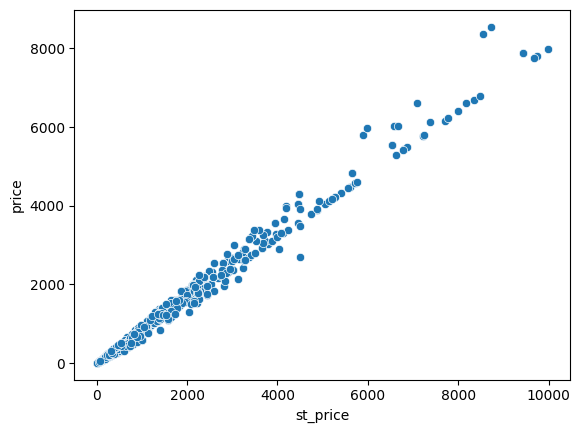

In [57]:
sns.scatterplot(x = 'st_price', y = 'price', data = df1[df1['old_price'] != 'No old price']);

In [58]:
# Дивимось чи дійсно підтверджується, що old_prise завжди більша -> так
df1_pr = df1[df1['old_price'] != 'No old price']
df1_pr[(df1_pr['st_price'] - df1_pr['price']) < 0]

,item_id,name,category,price,old_price,other_colors,short_description,designer,depth,height,width,st_price


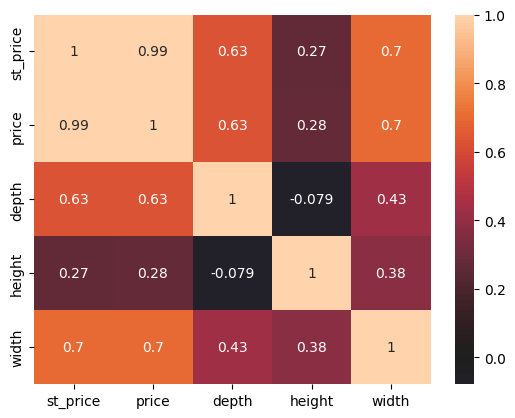

In [59]:
# З теплової карти видно, що наша гіпотеза про кращу кореляцію стандартної ціни не підтвердилась (вона корелює так само з глибиною і шириною як і акційна ціна)
sns.heatmap(df1[['st_price', 'price', 'depth', 'height', 'width']].corr(), xticklabels= df1[['st_price', 'price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df1[['st_price','price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

In [60]:
# Подивимось на товари, які попали на розпродаж
df_sale = df1[df1['old_price'] != 'No old price']

<Axes: xlabel='count', ylabel='category'>

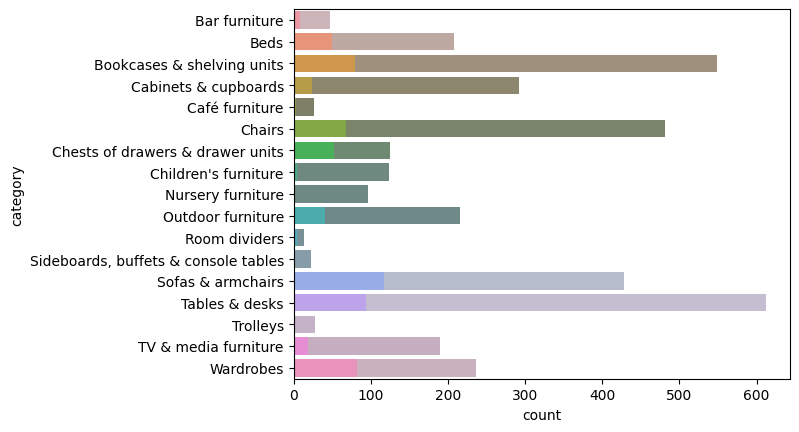

In [61]:
sns.countplot(data=df1, y='category', saturation=0.2)
sns.countplot(data=df_sale, y='category')


In [62]:
df_sale['%sale'] = round((df_sale['st_price']-df_sale['price'])/df_sale['st_price']*100, 0)
df_sale.sample(5)

,item_id,name,category,price,old_price,other_colors,short_description,designer,depth,height,width,st_price,%sale
2617,10441729,FLOTTEBO,Sofas & armchairs,316.0,SR 395,Yes,"Cover sofa-bed, 90 cm",104.417.29 The cover is easy to keep clean as ...,NaN,NaN,NaN,395.0,20.0
1364,50420329,FREKVENS,Chairs,177.0,SR 295,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,295.0,40.0
2632,59133593,LINNMON / ADILS,Tables & desks,270.0,SR 315,Yes,"Corner table, 120x120 cm",Jon Karlsson,NaN,74.0,120.0,315.0,14.0
2768,40344449,VILTO,Tables & desks,87.0,SR 145,No,"Storage stool, 45 cm",Maja Ganszyniec,30.0,45.0,48.0,145.0,40.0
2773,59216668,LINNMON / ODDVALD,Tables & desks,255.0,SR 325,No,"Table, 150x75 cm",IKEA of Sweden,NaN,73.0,75.0,325.0,22.0


In [63]:
df_sale['%sale'].describe()

count    654.000000
mean      18.655963
std        9.545859
min        0.000000
25%       12.000000
50%       20.000000
75%       20.000000
max       50.000000
Name: %sale, dtype: float64

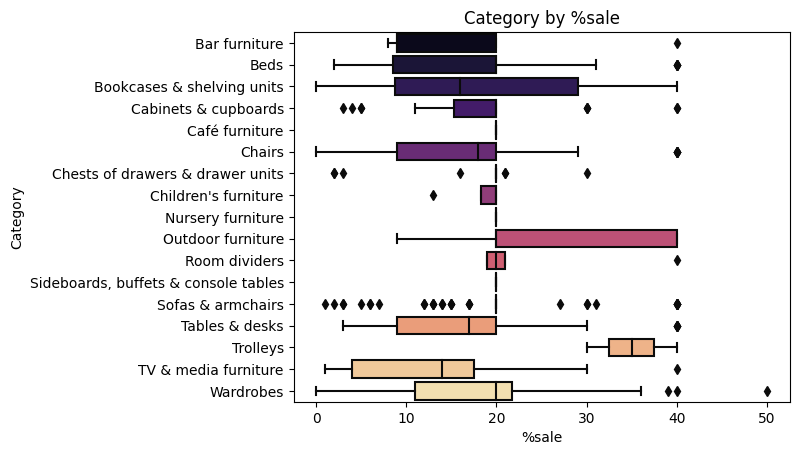

In [64]:
sns.boxplot(data=df_sale, y="category", x="%sale", palette= 'magma')
plt.xlabel('%sale')
plt.ylabel('Category')
plt.title('Category by %sale')
plt.show();

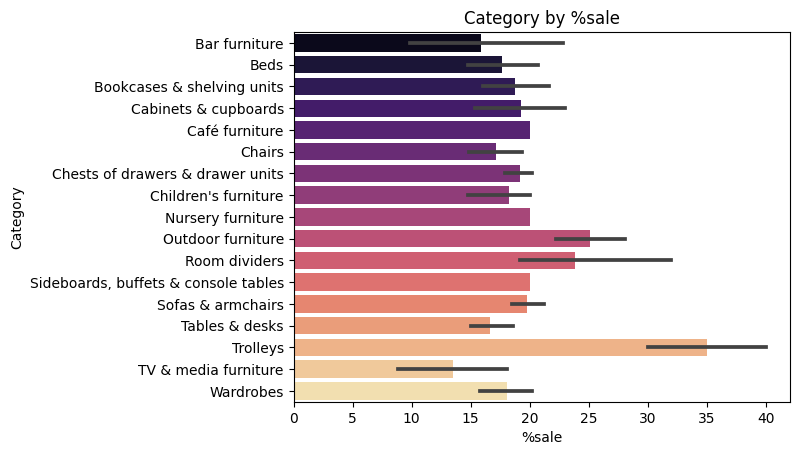

In [65]:
#Бачимо, що в середньому по всіх категоріях, це 20%. Найбільший розпродаж 'Trolleys' - в середньому 35% (від 30%-40%)
#Найменший в середньому розпродаж по категорії 'TV & media furniture'
sns.barplot(data=df_sale, y="category", x="%sale", palette= 'magma')
#plt.grid()
plt.xlabel('%sale')
plt.ylabel('Category')
plt.title('Category by %sale')
plt.show();

In [66]:
# Оскільки наші дані дуже розрізнені, подивимось які колонки можна обєднати або за якою логікою видаляти дублікати
df1['category'].value_counts()

category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

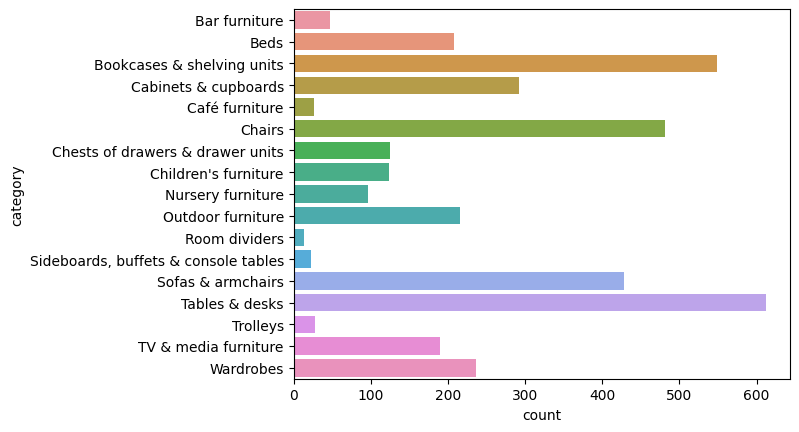

In [67]:
sns.countplot(data=df1, y='category')

>Видалення дублікатів
>> Спосіб 1: Видаляємо дублікати перш за все з найбільшчисельних категорій. Це повинно трохи згладити наш розподіл по категоріях. В даному випадку залишаємо всі категорії (нічого не обєднуємо)

In [68]:
#Спочатку необхідно посортувати дані за к-стю item в категоріях, а потім видалити дублікати за принципом першого.
df_unique1 = df1.copy()
for i in range(df_unique1.shape[0]):
    df_unique1.loc[i, 'category_count'] = df_unique1[df_unique1['category'] == df_unique1.loc[i,'category']].shape[0]
df_unique1.sort_values(by='category_count', ascending=False, inplace=True)


In [69]:
df_unique1.drop_duplicates(subset='item_id', keep='last', inplace=True)
df_unique1.shape

(2962, 13)

In [70]:
df_unique1['category'].value_counts()

category
Bookcases & shelving units              408
Chairs                                  387
Sofas & armchairs                       383
Tables & desks                          368
Wardrobes                               222
Outdoor furniture                       202
Cabinets & cupboards                    195
Beds                                    193
TV & media furniture                    188
Chests of drawers & drawer units        119
Nursery furniture                        97
Children's furniture                     72
Bar furniture                            39
Trolleys                                 27
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

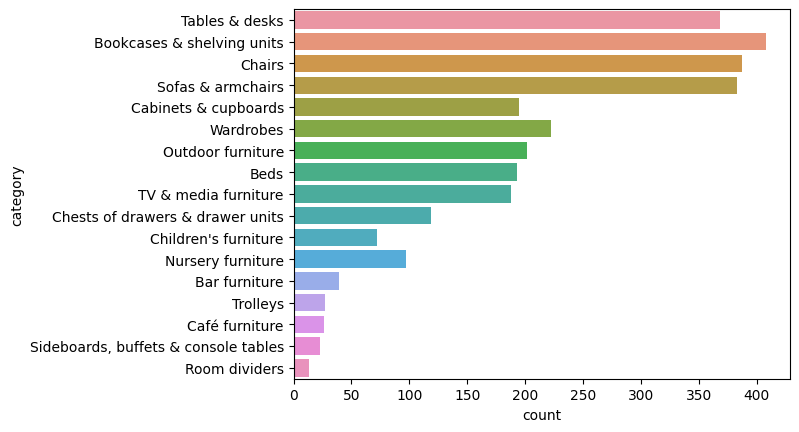

In [71]:
#Бачимо, що завдяки даному способу видалення дублікатів, наші вибірки дещо згладились.
sns.countplot(data=df_unique1, y='category')

In [72]:
df_unique1.drop(columns='category_count', inplace=True)

>> Спосіб 2: Видаляємо дублікати перш за все з колонок,які мають найменше унікальних значень item_id. Потім пробуємо обєднати якісь колонки чи переформатувати малочисельні. Це повинно зменшити кількість категорій.

In [73]:
#Відсоток дублікатів в групі
df_dup = df[df1.duplicated(keep=False, subset=['item_id'])]
df_dup.groupby('category')['item_id'].count()/df1.groupby('category')['item_id'].count()*100
# Як виявилось 'Bar furniture', 'Nursery furniture', 'Children's furniture' на більш ніж 90% складаються з дублікатів

category
Bar furniture                           95.744681
Beds                                    25.961538
Bookcases & shelving units              27.737226
Cabinets & cupboards                    48.287671
Café furniture                          84.615385
Chairs                                  49.688150
Chests of drawers & drawer units        23.200000
Children's furniture                    90.322581
Nursery furniture                       93.814433
Outdoor furniture                       11.574074
Room dividers                           61.538462
Sideboards, buffets & console tables    69.565217
Sofas & armchairs                       12.149533
TV & media furniture                    53.157895
Tables & desks                          39.869281
Trolleys                                17.857143
Wardrobes                                6.779661
Name: item_id, dtype: float64

In [74]:
# Найменше недубльованих товарів є в "Bar furniture", "Café furniture", "Room dividers", "Nursery furniture", "Sideboards, buffets & console tables"
df1.groupby('category')['item_id'].count() - df_dup.groupby('category')['item_id'].count()

category
Bar furniture                             2
Beds                                    154
Bookcases & shelving units              396
Cabinets & cupboards                    151
Café furniture                            4
Chairs                                  242
Chests of drawers & drawer units         96
Children's furniture                     12
Nursery furniture                         6
Outdoor furniture                       191
Room dividers                             5
Sideboards, buffets & console tables      7
Sofas & armchairs                       376
TV & media furniture                     89
Tables & desks                          368
Trolleys                                 23
Wardrobes                               220
Name: item_id, dtype: int64

In [75]:
df_unique2 = df1.copy()
for i in range(df_unique2.shape[0]):
    df_unique2.loc[i, 'category_count'] = df_unique2[df_unique2['category'] == df_unique2.loc[i,'category']].shape[0]
df_unique2.sort_values(by='category_count', ascending=True, inplace=True)

In [76]:
df_unique2.drop_duplicates(subset='item_id', keep='last', inplace=True)
df_unique2.shape

(2962, 13)

In [77]:
df_unique2['category'].value_counts()

category
Tables & desks                          612
Bookcases & shelving units              536
Sofas & armchairs                       420
Chairs                                  328
Wardrobes                               234
Outdoor furniture                       197
Cabinets & cupboards                    180
Beds                                    168
Chests of drawers & drawer units        102
TV & media furniture                     90
Children's furniture                     47
Trolleys                                 24
Sideboards, buffets & console tables      7
Nursery furniture                         6
Room dividers                             5
Café furniture                            4
Bar furniture                             2
Name: count, dtype: int64

In [78]:
#Подивимось на малочисельні групи
df_unique2[(df_unique2['category'] == 'Bar furniture') | (df_unique2['category'] == 'Café furniture')]

,item_id,name,category,price,old_price,other_colors,short_description,designer,depth,height,width,st_price,category_count
1099,49288236,STENSELE,Café furniture,450.0,No old price,Yes,"Table, 70 cm",Maja Ganszyniec,NaN,75.0,NaN,450.0,26.0
1102,40429014,NORRÅKER,Café furniture,476.0,SR 595,Yes,"Bar table, 74x74 cm",J Karlsson/N Karlsson,NaN,102.0,74.0,595.0,26.0
1119,59259752,LEIFARNE,Café furniture,275.0,No old price,No,Chair with armrests,Mia Lagerman,50.0,87.0,53.0,275.0,26.0
1116,49259743,SVENBERTIL,Café furniture,275.0,No old price,Yes,Chair with armrests,Mia Lagerman,50.0,84.0,53.0,275.0,26.0
17,50363649,KULLABERG,Bar furniture,140.0,SR 175,Yes,Stool,Sarah Fager,36.0,NaN,36.0,175.0,47.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,2095.0,47.0


In [79]:
# Отже, виходячи з короткого опису ми можемо віднести ці товари до 'Tables & desks' і 'Chairs'.
df_unique2.loc[1099, 'category'] = 'Tables & desks'
df_unique2.loc[1102, 'category'] = 'Tables & desks'
df_unique2.loc[1116, 'category'] = 'Chairs'
df_unique2.loc[1119, 'category'] = 'Chairs'
df_unique2.loc[2, 'category'] = 'Tables & desks'
df_unique2.loc[17, 'category'] = 'Chairs'

In [80]:
df_unique2[(df_unique2['category'] == 'Room dividers')]

,item_id,name,category,price,old_price,other_colors,short_description,designer,depth,height,width,st_price,category_count
2176,9017483,KALLAX,Room dividers,695.0,No old price,Yes,"Shelving unit with 4 inserts, ...",Tord Björklund,39.0,147.0,147.0,695.0,13.0
2165,70301537,KALLAX,Room dividers,725.0,No old price,Yes,"Shelving unit, 182x182 cm",IKEA of Sweden,39.0,182.0,182.0,725.0,13.0
2173,70268811,BEKANT,Room dividers,357.0,SR 595,Yes,"Screen for desk, 120 cm",K Malmvall/E Lilja Löwenhielm,NaN,120.0,83.0,595.0,13.0
2167,30275861,KALLAX,Room dividers,495.0,No old price,Yes,"Shelving unit, 147x147 cm",Tord Björklund,39.0,147.0,147.0,495.0,13.0
2166,79166399,VIDGA,Room dividers,220.0,No old price,No,Room divider for corner,David Wahl,NaN,NaN,NaN,220.0,13.0


In [81]:
df_unique2.loc[2176, 'category'] = 'Bookcases & shelving units'
df_unique2.loc[2165, 'category'] = 'Bookcases & shelving units'
df_unique2.loc[2167, 'category'] = 'Bookcases & shelving units'
df_unique2.loc[2173, 'category'] = 'Tables & desks'
df_unique2.loc[2166, 'category'] = 'Bookcases & shelving units'

In [82]:
# Обєднаємо категорії "Children's furniture" і 'Nursery furniture'
for i in df_unique2.index:
    if (df_unique2.loc[i, 'category'] == "Children's furniture") or (df_unique2.loc[i, 'category'] == 'Nursery furniture'):
        df_unique2.loc[i, 'category'] = "Children's & Nursary furniture"
    else:
        continue

In [83]:
df_unique2[(df_unique2['category'] == 'Sideboards, buffets & console tables')]

,item_id,name,category,price,old_price,other_colors,short_description,designer,depth,height,width,st_price,category_count
2177,10459903,KALLAX,"Sideboards, buffets & console tables",295.0,No old price,Yes,"Shelving unit, 77x147 cm",Tord Björklund,39.0,147.0,77.0,295.0,23.0
2183,9139724,BESTÅ,"Sideboards, buffets & console tables",890.0,No old price,Yes,"Storage combination with doors, ...",IKEA of Sweden,40.0,74.0,180.0,890.0,23.0
2186,40404202,HAVSTA,"Sideboards, buffets & console tables",495.0,No old price,Yes,"Console table, 100x35x63 cm",IKEA of Sweden,NaN,63.0,35.0,495.0,23.0
2193,89265836,HAVSTA,"Sideboards, buffets & console tables",1550.0,No old price,Yes,"Storage combination, 162x37x1...",IKEA of Sweden,37.0,134.0,162.0,1550.0,23.0
2196,79265945,HAVSTA,"Sideboards, buffets & console tables",1950.0,No old price,Yes,"Storage combination w glass doors, ...",IKEA of Sweden,37.0,134.0,162.0,1950.0,23.0
2197,39300856,BESTÅ,"Sideboards, buffets & console tables",965.0,No old price,Yes,"Storage combination w glass doors, ...",IKEA of Sweden/Marcus Arvonen,42.0,193.0,60.0,965.0,23.0
2194,79275119,HAVSTA,"Sideboards, buffets & console tables",1395.0,No old price,Yes,"Glass-door cabinet with plinth, ...",IKEA of Sweden,37.0,134.0,121.0,1395.0,23.0


In [84]:
df_unique2.loc[2177, 'category'] = 'Bookcases & shelving units'
df_unique2.loc[2183, 'category'] = 'Cabinets & cupboards'
df_unique2.loc[2186, 'category'] = 'Tables & desks'
df_unique2.loc[2193, 'category'] = 'Cabinets & cupboards'
df_unique2.loc[2196, 'category'] = 'Cabinets & cupboards'
df_unique2.loc[2197, 'category'] = 'Cabinets & cupboards'
df_unique2.loc[2194, 'category'] = 'Cabinets & cupboards'

<Axes: xlabel='count', ylabel='category'>

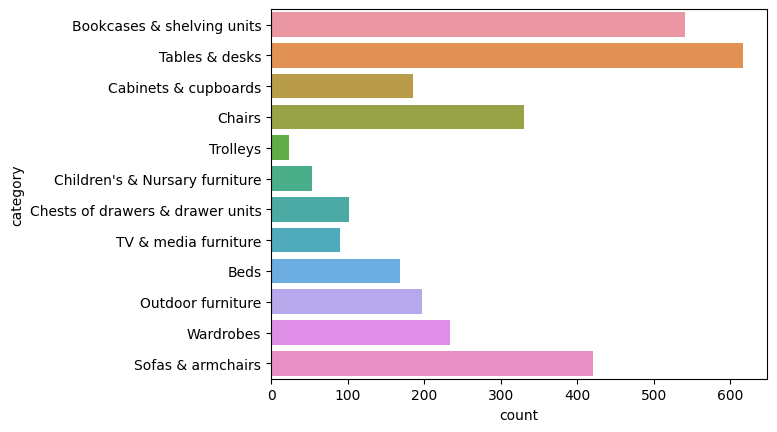

In [85]:
#Бачимо, що к-сть категорій зменшилась до 12 і дані дещо згладились
sns.countplot(data=df_unique2, y='category')

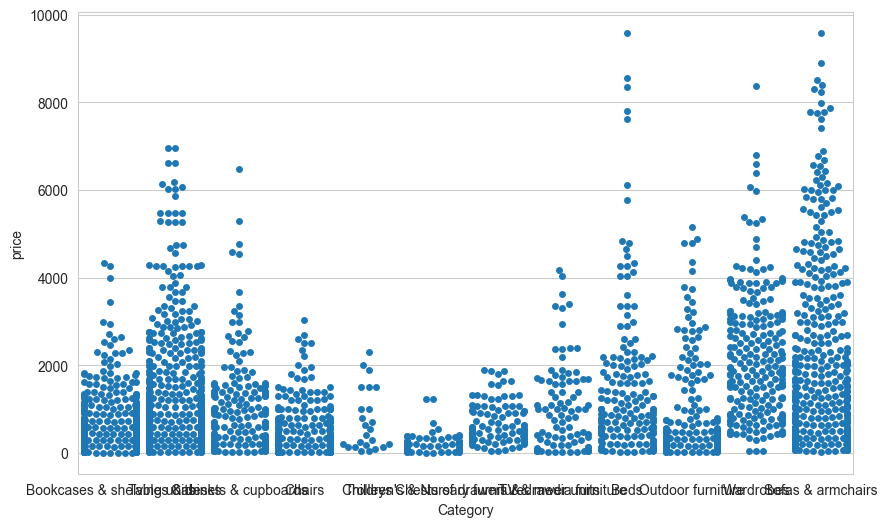

In [86]:
plt.figure(figsize = (10,6))

sns.set_style('whitegrid')

sns.swarmplot(x= 'category', y ='price', data = df_unique2);
plt.xlabel('Category', )
plt.ylabel('price')

plt.show()

In [87]:
df_unique2.drop(columns='category_count', inplace=True)

In [88]:
df_unique2.head()   

,item_id,name,category,price,old_price,other_colors,short_description,designer,depth,height,width,st_price
2176,9017483,KALLAX,Bookcases & shelving units,695.0,No old price,Yes,"Shelving unit with 4 inserts, ...",Tord Björklund,39.0,147.0,147.0,695.0
2165,70301537,KALLAX,Bookcases & shelving units,725.0,No old price,Yes,"Shelving unit, 182x182 cm",IKEA of Sweden,39.0,182.0,182.0,725.0
2173,70268811,BEKANT,Tables & desks,357.0,SR 595,Yes,"Screen for desk, 120 cm",K Malmvall/E Lilja Löwenhielm,NaN,120.0,83.0,595.0
2167,30275861,KALLAX,Bookcases & shelving units,495.0,No old price,Yes,"Shelving unit, 147x147 cm",Tord Björklund,39.0,147.0,147.0,495.0
2166,79166399,VIDGA,Bookcases & shelving units,220.0,No old price,No,Room divider for corner,David Wahl,NaN,NaN,NaN,220.0


In [89]:
df_unique2.dtypes

item_id                int64
name                  object
category              object
price                float64
old_price             object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
st_price             float64
dtype: object

In [90]:
df_unique2.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
other_colors            0
short_description       0
designer                0
depth                1118
height                726
width                 442
st_price                0
dtype: int64

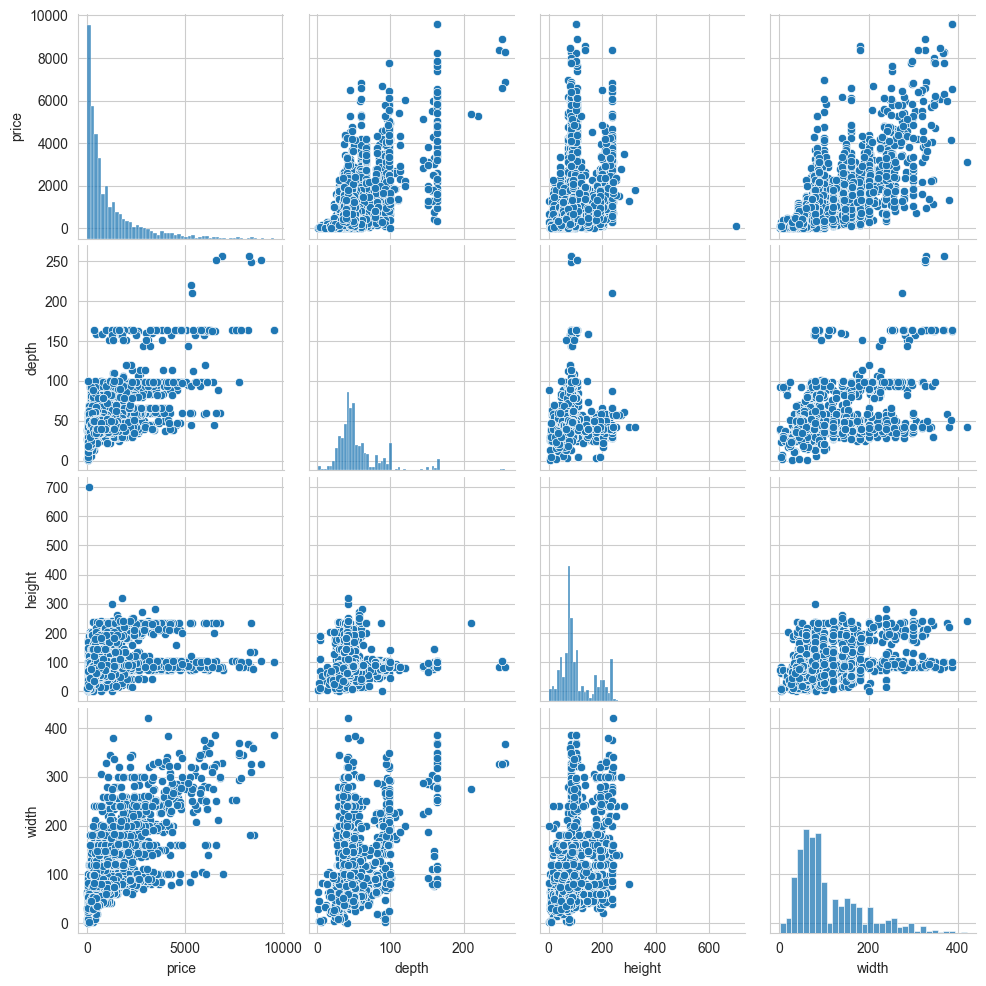

In [91]:
# є помилкові дані в висоті - викид (700 мм)
sns.pairplot(df_unique1[['price', 'depth', 'height', 'width', 'other_colors']])

In [92]:
#Бачимо в описі товари, що це ніжка до столу - 70 см, а не 7 м
df_unique1[df_unique1['height'] > 400]

,item_id,name,category,price,old_price,other_colors,short_description,designer,depth,height,width,st_price
2884,80278273,HILVER,Tables & desks,100.0,No old price,No,"Leg cone-shaped, 70 cm",Chenyi Ke,NaN,700.0,NaN,100.0


In [93]:
#Виправимо дані
df_unique1.loc[2884, 'height'] = 70
df_unique2.loc[2884, 'height'] = 70

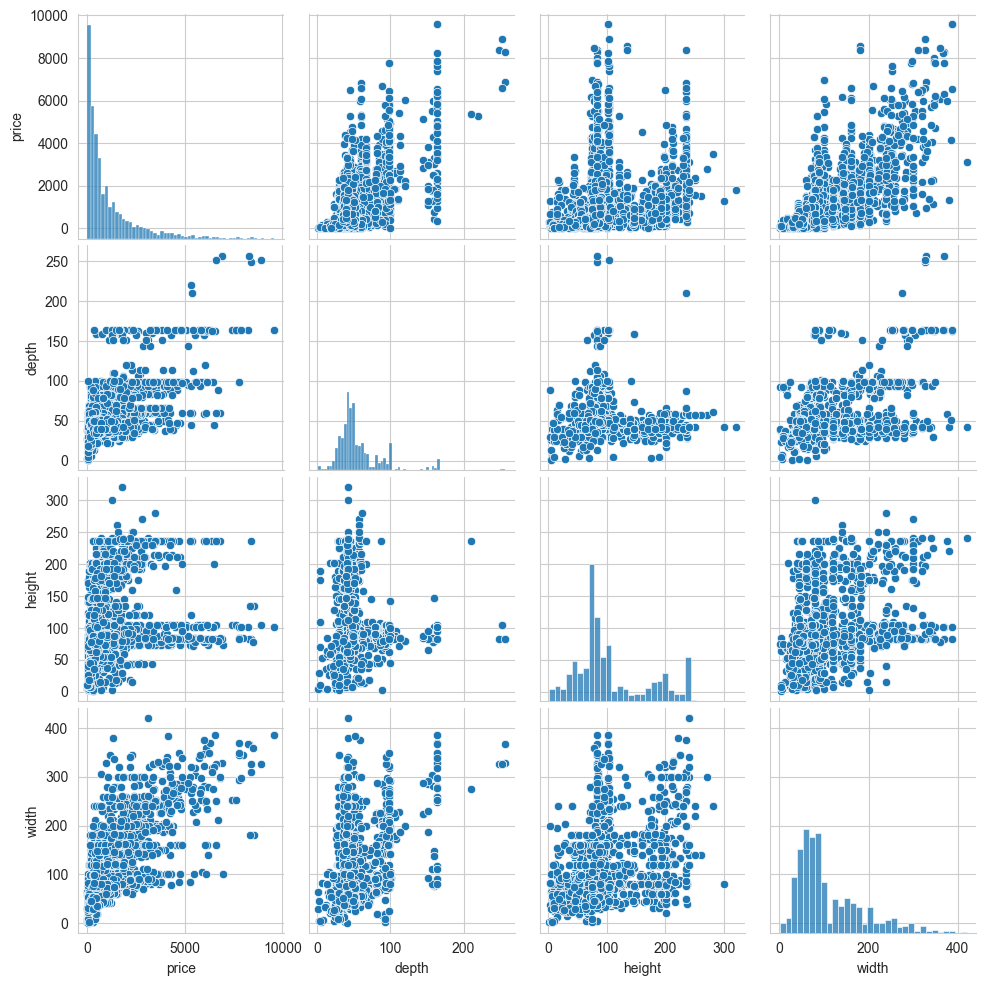

In [94]:
sns.pairplot(df_unique1[['price', 'depth', 'height', 'width', 'other_colors']])

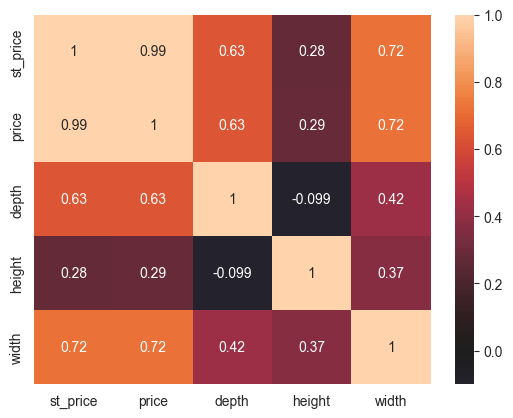

In [95]:
#Доречі, в очищених від дублікатів даних - трохи більша кореляція ціни та ширини
sns.heatmap(df_unique1[['st_price', 'price', 'depth', 'height', 'width']].corr(), xticklabels= df_unique1[['st_price', 'price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= df_unique1[['st_price','price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

In [96]:
# Застосуємо SelectKbest для знаходження найбільш інформативних стовпців

In [97]:
df_uni1 = df_unique1.copy()
df_uni1.dropna(inplace= True)

In [98]:
df_uni1.shape

(1602, 12)

  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best features: [0 1 3]
[[ 75. 142. 395.]
 [ 74.  49. 625.]
 [ 78. 120. 375.]
 ...
 [147. 147. 895.]
 [147. 147. 495.]
 [182. 182. 725.]]


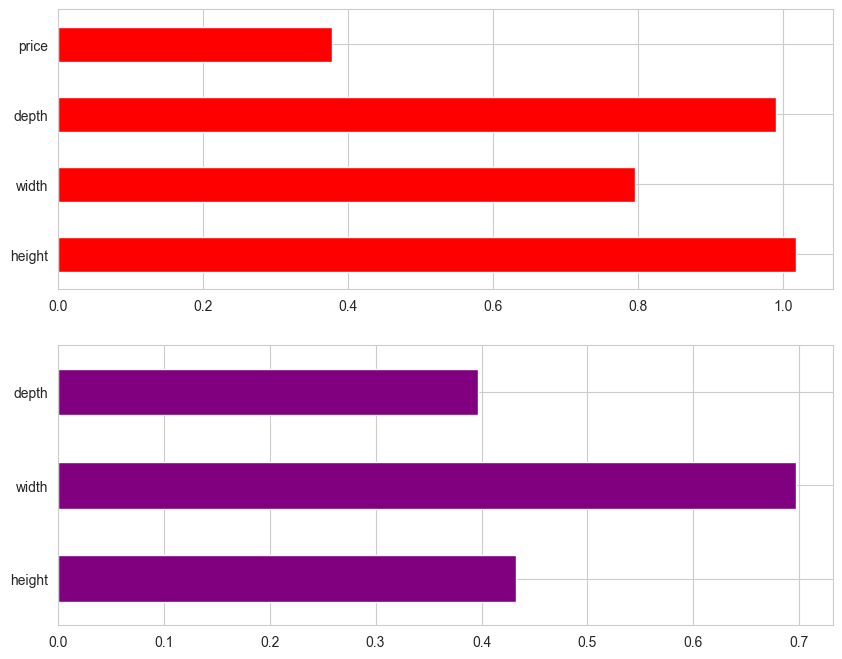

In [99]:
# Застосуємо SelectKbest для знаходження найбільш інформативних стовпців
# chi2 - 
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

w_df_X = df_uni1[['height', 'width', 'depth', 'price']]
w_df_y = df_uni1['category']

# descrete 'category'
importance_0 = mutual_info_classif(w_df_X, w_df_y)
feature_importances_0 = pd.Series(importance_0, w_df_X.columns)
feature_importances_0.plot(kind='barh', color='red', ax = ax1)

w_df_X_1 = df_uni1[['height', 'width', 'depth']]
w_df_y_1 = df_uni1['price']

# long 'price'
importance_1 = mutual_info_regression(w_df_X_1, w_df_y_1)
feature_importances_1 = pd.Series(importance_1, w_df_X_1.columns)
feature_importances_1.plot(kind='barh', color='purple', ax = ax2)

chi2_features = SelectKBest(chi2, k=3) 
X_kbest_features = chi2_features.fit(w_df_X, w_df_y)
print('Best features:', X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(w_df_X)
print(transformed_X)

plt.show() # See that width and height important columns

In [100]:
# Застосуємо SelectKbest для df_unique2
df_uni2 = df_unique2.copy()
df_uni2.dropna(inplace= True)

Best features: [0 1 3]
[[ 147.  147.  695.]
 [ 182.  182.  725.]
 [ 147.  147.  495.]
 ...
 [ 101.   41. 1100.]
 [ 176.  150. 1245.]
 [  66.   54.  375.]]


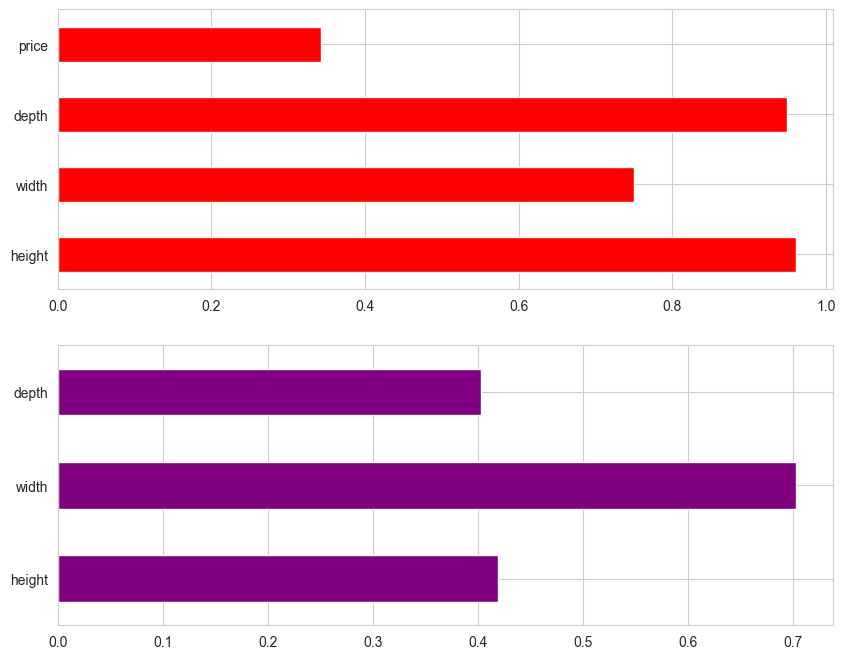

In [101]:
# Оскільки в df_unique2 за іншим алгоритмом видалялись дублікати (по-іншому розпреділено по категоріям), то перший графік виглядає по-іншому
# chi2 - 
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

w_df_X = df_uni2[['height', 'width', 'depth', 'price']]
w_df_y = df_uni2['category']

# descrete 'category'
importance_0 = mutual_info_classif(w_df_X, w_df_y)
feature_importances_0 = pd.Series(importance_0, w_df_X.columns)
feature_importances_0.plot(kind='barh', color='red', ax = ax1)

w_df_X_1 = df_uni2[['height', 'width', 'depth']]
w_df_y_1 = df_uni2['price']

# long 'price'
importance_1 = mutual_info_regression(w_df_X_1, w_df_y_1)
feature_importances_1 = pd.Series(importance_1, w_df_X_1.columns)
feature_importances_1.plot(kind='barh', color='purple', ax = ax2)

chi2_features = SelectKBest(chi2, k=3) 
X_kbest_features = chi2_features.fit(w_df_X, w_df_y)
print('Best features:', X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(w_df_X)
print(transformed_X)

plt.show() # See that width and height important columns

>> Очистимо стовпчик 'designer'

In [102]:
df_unique1['designer'].sample(8)

2115               Andreas Fredriksson
1234                      Ola Wihlborg
1837                    IKEA of Sweden
1180                      Mia Lagerman
2634                         Chenyi Ke
2591                     Nike Karlsson
3683    Ehlén Johansson/IKEA of Sweden
479        IKEA of Sweden/Jon Karlsson
Name: designer, dtype: object

In [103]:
df_unique1[df_unique1['designer'].str.contains('\d')]['designer']

2670    104.321.93 The tabletop in tempered glass is s...
2699    904.238.87 Small, neat dimensions make the tab...
2701    602.141.83 The pull-out panel gives you an ext...
2630    602.141.59 You can collect cables and extensio...
2812    003.494.44 Separate shelf for magazines, etc. ...
                              ...                        
1947    504.662.75 Fits in TROFAST frames.Can be stack...
1946    404.662.85 Fits in TROFAST frames.Can be stack...
1945    304.662.81 Fits in TROFAST frames.Can be stack...
1880    804.334.86 Perfect height for small children. ...
1861    504.224.94 You can position the shelf and clot...
Name: designer, Length: 102, dtype: object

In [104]:
df_unique1['designer'].mode()

0    IKEA of Sweden
Name: designer, dtype: object

In [105]:
#Створюємо функцію для очистки колонки дизайнерів
def cleanDesigners(designer: pd.Series):
    if designer[0].isdigit():
        return "IKEA of Sweden"
    else:
        return designer


In [106]:
df_uniq1 = df_unique1.copy()
df_uniq1['designer'] = df_unique1['designer'].apply(cleanDesigners)

In [107]:
df_uniq1["designer"].nunique()

279

In [108]:
df_uniq2 = df_unique2.copy()
df_uniq2['designer'] = df_unique2['designer'].apply(cleanDesigners)

In [109]:
df_uniq1.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
other_colors            0
short_description       0
designer                0
depth                1118
height                726
width                 442
st_price                0
dtype: int64

**Pipeline**

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
# 
X = df_uniq1[['depth', 'width', 'height', 'category', 'designer', 'other_colors']]
Y = df_uniq1['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74918
MAE : 415.06517
MSE : 690.35269


In [112]:
# Бачимо, що і тут кореляція зі "стандартною ціною" має гірші показники. Тому в майбутьому варто аналізувати 'price'
X = df_uniq1[['depth', 'width', 'height', 'category', 'designer', 'other_colors']]
Y = df_uniq1['st_price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.71565
MAE : 476.45940
MSE : 771.61586


In [113]:
# Використання очищеного dataset згідно другого алгоритму показав також гірший результат ніж перший. Тому працюватимемо з uniq1 
X = df_uniq2[['depth', 'width', 'height', 'category', 'designer', 'other_colors']]
Y = df_uniq2['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.66560
MAE : 442.40013
MSE : 804.23580


**Модель**

In [114]:
# Інший варіант - заповнення даних вручну 
ikea_df1 = df_uniq1.copy()
ikea_df1['other_colors_1'] = ikea_df1['other_colors'].map(dict(Yes=1, No=0))

median_d = ikea_df1.groupby(['category'])['depth'].median()
median_h = ikea_df1.groupby(['category'])['height'].median()
median_w = ikea_df1.groupby(['category'])['width'].median()

median_price = ikea_df1.groupby(['category'])['price'].median()
median_dsgn =  ikea_df1.groupby(['designer'])['price'].median()

ikea_df1 = ikea_df1.set_index(['category'])
ikea_df1['depth_1'] = ikea_df1['depth'].fillna(median_d)
ikea_df1['height_1'] = ikea_df1['height'].fillna(median_h)
ikea_df1['width_1'] = ikea_df1['width'].fillna(median_w)
ikea_df1['category_median_price'] = median_price

ikea_df1 = ikea_df1.reset_index()

ikea_df1 = ikea_df1.set_index(['designer'])
ikea_df1['designer_median_price'] = median_dsgn
ikea_df1 = ikea_df1.reset_index()
ikea_df1.head()

,designer,category,item_id,name,price,old_price,other_colors,short_description,depth,height,width,st_price,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Carina Bengs,Tables & desks,50087072,LIATORP,645.0,No old price,No,"Coffee table, 93x93 cm",NaN,51.0,93.0,645.0,0,48.0,51.0,93.0,475.0,970.0
1,IKEA of Sweden,Tables & desks,39932562,LINNMON / ADILS,145.0,No old price,Yes,"Table, 120x60 cm",NaN,74.0,60.0,145.0,1,48.0,74.0,60.0,475.0,275.0
2,IKEA of Sweden,Tables & desks,59000705,LINNMON / LERBERG,175.0,No old price,Yes,"Table, 120x60 cm",NaN,74.0,60.0,175.0,1,48.0,74.0,60.0,475.0,275.0
3,Henrik Preutz,Tables & desks,90214308,MICKE,395.0,No old price,Yes,"Desk, 142x50 cm",50.0,75.0,142.0,395.0,1,50.0,75.0,142.0,475.0,572.5
4,Nike Karlsson,Tables & desks,20382932,RÅSKOG,189.0,No old price,Yes,"Trolley, 35x45x78 cm",NaN,78.0,45.0,189.0,1,48.0,78.0,45.0,475.0,299.0


In [115]:
# Function to choose BestRegressor
# Step by step fit data for different model, and display result
def getBestRegressor (X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        KNeighborsRegressor(n_neighbors=16),
        DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])
        
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [116]:
X1 = ikea_df1[['width_1','depth_1','height_1']]
Y1 = ikea_df1['price']

In [117]:
test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)
# We can see that RandomForestRegressor have best result for predict price, next step to tunning model 

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.78707,375.35170,636.06680
GradientBoostingRegressor,0.72343,451.53514,724.92117
DecisionTreeRegressor,0.69652,445.31447,759.36284
KNeighborsRegressor,0.68638,480.49090,771.95357
LassoCV,0.45889,643.58935,1013.98444
LinearRegression,0.45883,643.62101,1014.03720
RidgeCV,0.45883,643.62096,1014.03712
SVR,0.44042,614.04705,1031.13796


In [118]:
from sklearn.model_selection import GridSearchCV
# Use  GridSearchCV for tunning model 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=200)
Best Score     : 0.7701697362976139

R^2            : 0.80067
MAE            : 363.74862
RMSE           : 615.41848

Feature importance:
--------------------------------
0.53471    width_1
0.25772    depth_1
0.20757    height_1


<Axes: >

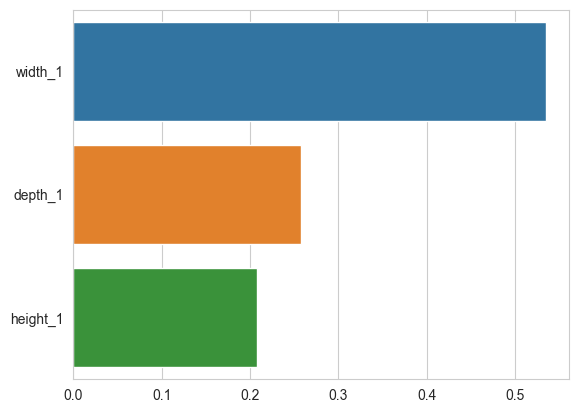

In [119]:
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

In [120]:
#Створимо другий варіант dataset для моделювання, де не будемо заповнювати пропущені дані, а просто видалимо їх
ikea_df2 = df_uniq1.dropna()

In [121]:
X2 = ikea_df2[['width','depth','height']]
Y2 = ikea_df2['price']

In [122]:
test2 = getBestRegressor(X2, Y2)
test2['model'].sort_values(by='R^2', ascending=False)
# Тут також найкращий результат показав RandomForestRegressor

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.86482,328.54899,545.42252
GradientBoostingRegressor,0.84923,376.08282,576.01770
DecisionTreeRegressor,0.82688,373.83383,617.23140
KNeighborsRegressor,0.77893,439.82979,697.49432
LinearRegression,0.72740,545.48357,774.52690
RidgeCV,0.72740,545.48314,774.52715
LassoCV,0.72723,545.25952,774.76354
SVR,0.69403,531.38256,820.57270


In [123]:
from sklearn.model_selection import GridSearchCV
# Use  GridSearchCV for tunning model 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X2, Y2, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : RandomForestRegressor(max_features='sqrt', n_estimators=130)
Best Score     : 0.8270372489927329

R^2            : 0.86861
MAE            : 320.98576
RMSE           : 537.72617

Feature importance:
--------------------------------
0.49220    width
0.30584    depth
0.20196    height


<Axes: >

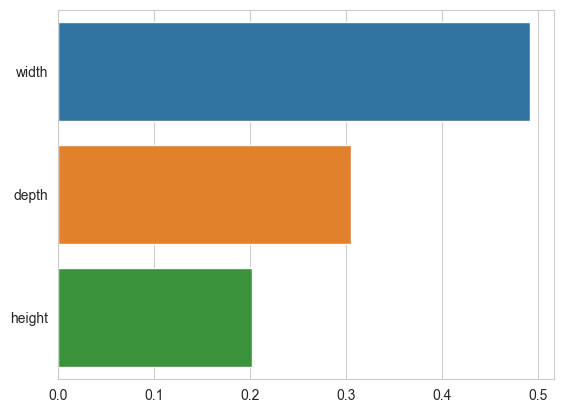

In [124]:
sns.set_style('whitegrid')
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_)

Висновки:
Для набору даних ikea був проведений аналіз даних та навчена модель для прогнозу ціни на товар. 
Зокрема, було розглянуто гіпотезу, що оскільки тільки частина товару має внесену стару ціну і на перший погляд вона більша за поточну, то ймовірно цей товар на момент вибірки бази даних був на акції. Було створене окремий стовбець 'st_price' і аналіз підтвердив, що всі без винятку старі ціни були вищими за нові, тобто це дійсно виявились акційні товари. Окремо, проведено аналіз розпродажу (в середньому знижка сягає 19%). При побудові моделі для прогнозу ціни бралась до уваги і ціна і стандартна ціна. Але ціна показала кращу кореляцію з іншими числовими значеннями, тому продовжено аналіз по ціні. 
Також, в процесі аналізу, визначено наявність дублікатів товарів, оскільки один і той же товар віднесено до різних (схожих) груп. Було обрано 2 стратегії для видалення дублікатів: 1 - видалення дублікатів, обираючи найбільшчисельні групи (для згладження к-сті даних по категоріях), 2- видаленя дублікатів, обираючи найменшчисельні групи і обєднання/перенесення товарів з дуже малих груп (для зменшення к-сті груп і укрупнення даних). В подальшому при розрахунку кореляції виявилась більш вдалою 1 стратегія.
При аналізі даних щодо розмірів товару (висоти, ширини, глибини) було виявлено хорошу кореляцію з ціною ширини та глибини товару, що і взято за основу побудови майбутньої моделі.
Наступним кроком проведено знаходження найбільш важливих стовпців за допомогою SelectKbest. І виявилось, що для 'category' найбільше значення мають 'height' і 'depth', а ціна має найменше значення. Тут якраз було проаналізований і другий варіант набору даних (по-іншому видалені дублікати, відрізняється якраз в частині категорій). Для ціни найбільш цінні колонки 'wight' і 'height'.
Наступним кроком були побудови моделей:
1) Взято до уваги такі фічі: 'depth', 'width', 'height', 'category', 'designer', 'other_colors'. З використанням Pipiline було проведено заповнення пустих значень (числові медіаною, категоріальні - найпоширенішим), скальовано числові дані та здійснено енкодінг категоріальних даних та побудовано модель DecisionTreeRegressor. Такі дії були проведені з трьома варіантами очищених даних: дані, де видалялись дублікати з найбільшчисельних груп - протестовано ціль: ціна і стандартна ціна (ціна показала кращі результати прогнозу R2 = 0,75); дані, де видалялись дублікати і укрупнювались категорії (показав найгірший варіант з трьох)
2) Взято до уваги такі фічі: 'depth', 'width', 'height'. Проведено заповнення даних вручну (скалірування не проводилось). Побудовано наступні моделі: LinearRegression, LassoCV, RidgeCV, SVR, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor. Найкращий результат показала модель RandomForestRegressor (R2=0,78, MAE=375, RMSE=636). Після тюнінгу R2=0,80, MAE=363, RMSE=616
3) Взято до уваги такі фічі: 'depth', 'width', 'height'. Але заповнення пустих розмірів не проводилось, а видалилось всі рядки з пустими значеннями (скалірування не проводилось). Побудовано наступні моделі: LinearRegression, LassoCV, RidgeCV, SVR, KNeighborsRegressor, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor. Найкращий результат показала знову ж таки модель RandomForestRegressor (R2=0,86, MAE=328, RMSE=545). Після тюнінгу R2=0,87, MAE=320, RMSE=537. Тобто показники суттєво кращі за попередній варіант, тобто видалення пустих даних, а не їх заповнення медіаною, показало кращий результат для моделювання прогнозу ціни.

Загалом, вийшло створити модель ML для прогнозу ціни виходячи з розмірів товару з досить непоганими параметрами. Але  для побудови більш точної моделі прогнозу ціни, бракує даних. Зокрема, собівартості виробництва товару, рейтинг товару і т.д.

In [125]:
# RandomForestRegressor для більшої к-сті даних - все одно гірші показники
X = df_uniq1[['depth', 'width', 'height', 'name', 'category', 'designer', 'other_colors']]
Y = df_uniq1['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['name', 'category', 'designer', 'other_colors',])
])


rfr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', RandomForestRegressor(random_state=42))
])

rfr.fit(X_train, Y_train)
rfr_predict = rfr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(rfr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(rfr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(rfr_predict, Y_test))))

R^2 : 0.83131
MAE : 328.74639
MSE : 566.15411


In [126]:
# RandomForestRegressor для більшої к-сті даних і пусті значення видалені, а не заповнені - все одно гірші показники
X = ikea_df2[['depth', 'width', 'height', 'name', 'category', 'designer', 'other_colors']]
Y = ikea_df2['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler())
    
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['name', 'category', 'designer', 'other_colors',])
])


rfr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', RandomForestRegressor(random_state=42))
])

rfr.fit(X_train, Y_train)
rfr_predict = rfr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(rfr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(rfr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(rfr_predict, Y_test))))

R^2 : 0.84536
MAE : 335.84466
MSE : 583.35237
